In [130]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.2


In [131]:
# Random seed for reproducibility
seed = 16

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [132]:
X = np.genfromtxt('../input/anndlhw2data/Training.csv',delimiter=',',skip_header=True)

In [133]:
X_max = X.max(axis=0)
X_min = X.min(axis=0)

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_scaled = (X-X_min)/(X_max-X_min)

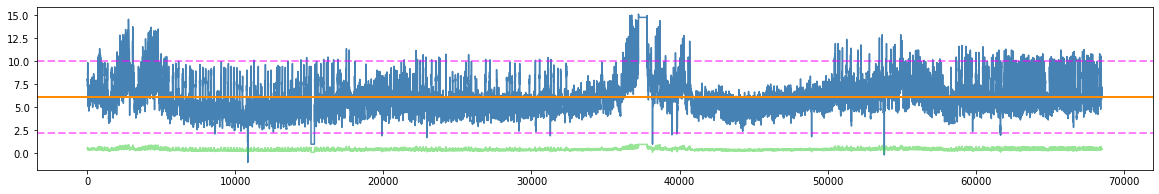

In [134]:
i=0
plt.figure(figsize=(20,3))
plt.plot(X[:,i],color='steelblue')
plt.plot(X_scaled[:,i],color='limegreen',alpha=.5)
plt.axhline(y=X_mean[i],color='darkorange',linewidth=2)
plt.axhline(y=X_mean[i]+2*X_std[i],color='magenta',alpha=.5,linestyle='--',linewidth=2)
plt.axhline(y=X_mean[i]-2*X_std[i],color='magenta',alpha=.5,linestyle='--',linewidth=2)

## Function for extracting sequences

In [135]:
def extract_sequences(array,sequence_length = 200,future=1,stride=1,shuffle=True,seed=1):
   
    X = []
    y = []
    for i in range(0,len(array),stride):
        if i+sequence_length+future < len(array):
            X.append(array[i:i+sequence_length])
            y.append(array[i+sequence_length:i+sequence_length+future])
    X = np.array(X)
    y = np.array(y)
    if shuffle:
        np.random.seed(seed)
        np.random.shuffle(X)
        np.random.seed(seed)
        np.random.shuffle(y)
    return X, y

## Single-Output

In [136]:
sequence_length = 200
future = 1 # Single-Output
stride = 1

In [137]:
X_train, y_train = extract_sequences(X_scaled,sequence_length, future, stride)

In [138]:
X_train.shape, y_train.shape

((68327, 200, 7), (68327, 1, 7))

In [139]:
y_train

array([[[0.58486477, 0.58576963, 0.41101177, ..., 0.60697305,
         0.5840368 , 0.39647727]],

       [[0.45911625, 0.44352824, 0.67936823, ..., 0.53112974,
         0.74368877, 0.72103748]],

       [[0.61955401, 0.54810096, 0.76129222, ..., 0.59316277,
         0.0840368 , 0.77619561]],

       ...,

       [[0.4434235 , 0.3640055 , 0.42231454, ..., 0.49649084,
         0.2296926 , 0.44524678]],

       [[0.4088375 , 0.48113444, 0.49858716, ..., 0.53792167,
         0.18487697, 0.53477753]],

       [[0.396242  , 0.68615693, 0.82202353, ..., 0.51030112,
         0.63024607, 0.88648942]]])

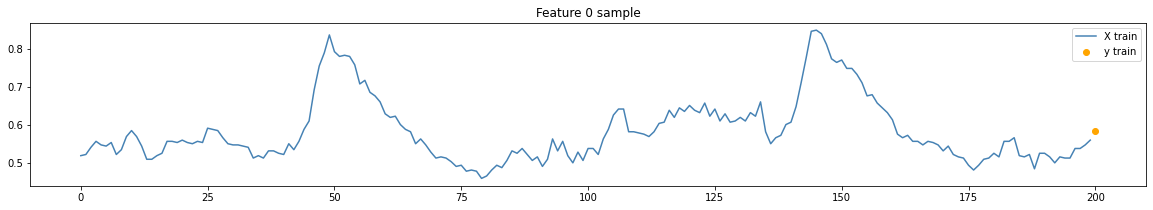

In [140]:
sample_index = 0
feature = 0

plt.figure(figsize=(20,3))
plt.plot(X_train[sample_index,:,feature],color='steelblue',label='X train')
plt.scatter(range(sequence_length,sequence_length+future),y_train[sample_index,:,feature],color='orange',label='y train')
plt.title('Feature 0 sample')
plt.legend()


## Multiple-Output

In [141]:
sequence_length = 200
future = 20 # Multiple-Output
stride = 1

In [142]:
X_train, y_train = extract_sequences(X_scaled,sequence_length, future, stride)

In [143]:
X_train.shape, y_train.shape

((68308, 200, 7), (68308, 20, 7))

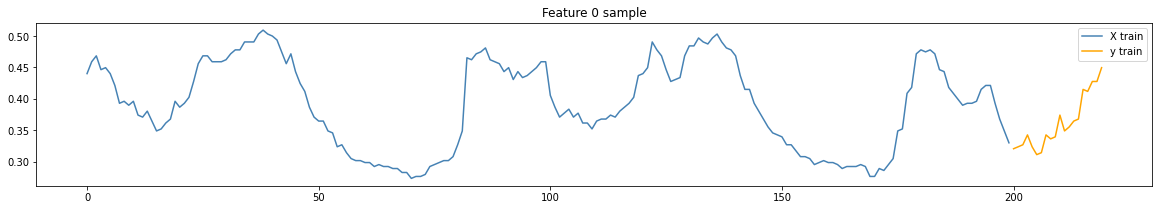

In [144]:
sample_index = 0
feature = 0

plt.figure(figsize=(20,3))
plt.plot(X_train[sample_index,:,feature],color='steelblue',label='X train')
plt.plot(range(sequence_length,sequence_length+future),y_train[sample_index,:,feature],color='orange',label='y train')
plt.title('Feature 0 sample')
plt.legend()
